# Student GPA Predictor

# Group 73

Bandara M.M.D.L
EG/2021/4434

Wijesinghe D.M.A.B
EG/2021/4875

# Introduction

The "Student GPA Predictor" project uses machine learning to predict students' GPAs based on factors like gender, study time, absences, and activities. It analyzes data from over 2,300 students to find patterns and help understand what affects academic performance.

# Literature Survey

The "Student GPA Predictor" project uses Random Forest and Linear Regression models to predict GPAs based on factors like study time, absences, and extracurricular activities. Random Forest excels in handling complex, non-linear relationships, offering higher accuracy, while Linear Regression provides a simpler, interpretable model to understand the influence of individual factors. Both methods are widely used in educational prediction tasks, with Random Forest often outperforming in accuracy.

# Importing Libraries

In [50]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
!pip install scikit-learn

# Dataset Description

This dataset contains comprehensive information on 2,392 high school students, detailing their demographics, study habits, parental involvement, extracurricular activities, and academic performance. The target variable, GradeClass, classifies students' grades into distinct categories, providing a robust dataset for educational research, predictive modeling, and statistical analysis

In [52]:
data_url = "https://drive.google.com/uc?export=download&id=1qXcTk1ytpMgskP1aTDB1p0Bh1kpW0jW5"
df = pd.read_csv(data_url)
df.head()

,StudentID,Gender,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,GPA,GradeClass
0,1001,1,19.833723,7,1,0,0,2.929196,2
1,1002,0,15.408756,0,0,0,0,3.042915,1
2,1003,0,4.210570,26,0,0,0,0.112602,4
3,1004,1,10.028829,14,0,1,0,2.054218,3
4,1005,1,4.672495,17,1,0,0,1.288061,4


In [53]:
df.shape

(2392, 9)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StudentID        2392 non-null   int64  
 1   Gender           2392 non-null   int64  
 2   StudyTimeWeekly  2392 non-null   float64
 3   Absences         2392 non-null   int64  
 4   Tutoring         2392 non-null   int64  
 5   Extracurricular  2392 non-null   int64  
 6   Sports           2392 non-null   int64  
 7   GPA              2392 non-null   float64
 8   GradeClass       2392 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 168.3 KB


In [55]:
df.describe()

,StudentID,Gender,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,0.510870,9.771992,14.541388,0.301421,0.383361,0.303512,1.906186,2.983696
std,690.655244,0.499986,5.652774,8.467417,0.458971,0.486307,0.459870,0.915156,1.233908
min,1001.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,0.000000,5.043079,7.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,1.000000,9.705363,15.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,1.000000,14.408410,22.000000,1.000000,1.000000,1.000000,2.622216,4.000000
max,3392.000000,1.000000,19.978094,29.000000,1.000000,1.000000,1.000000,4.000000,4.000000


# Exploratory Data Analysis

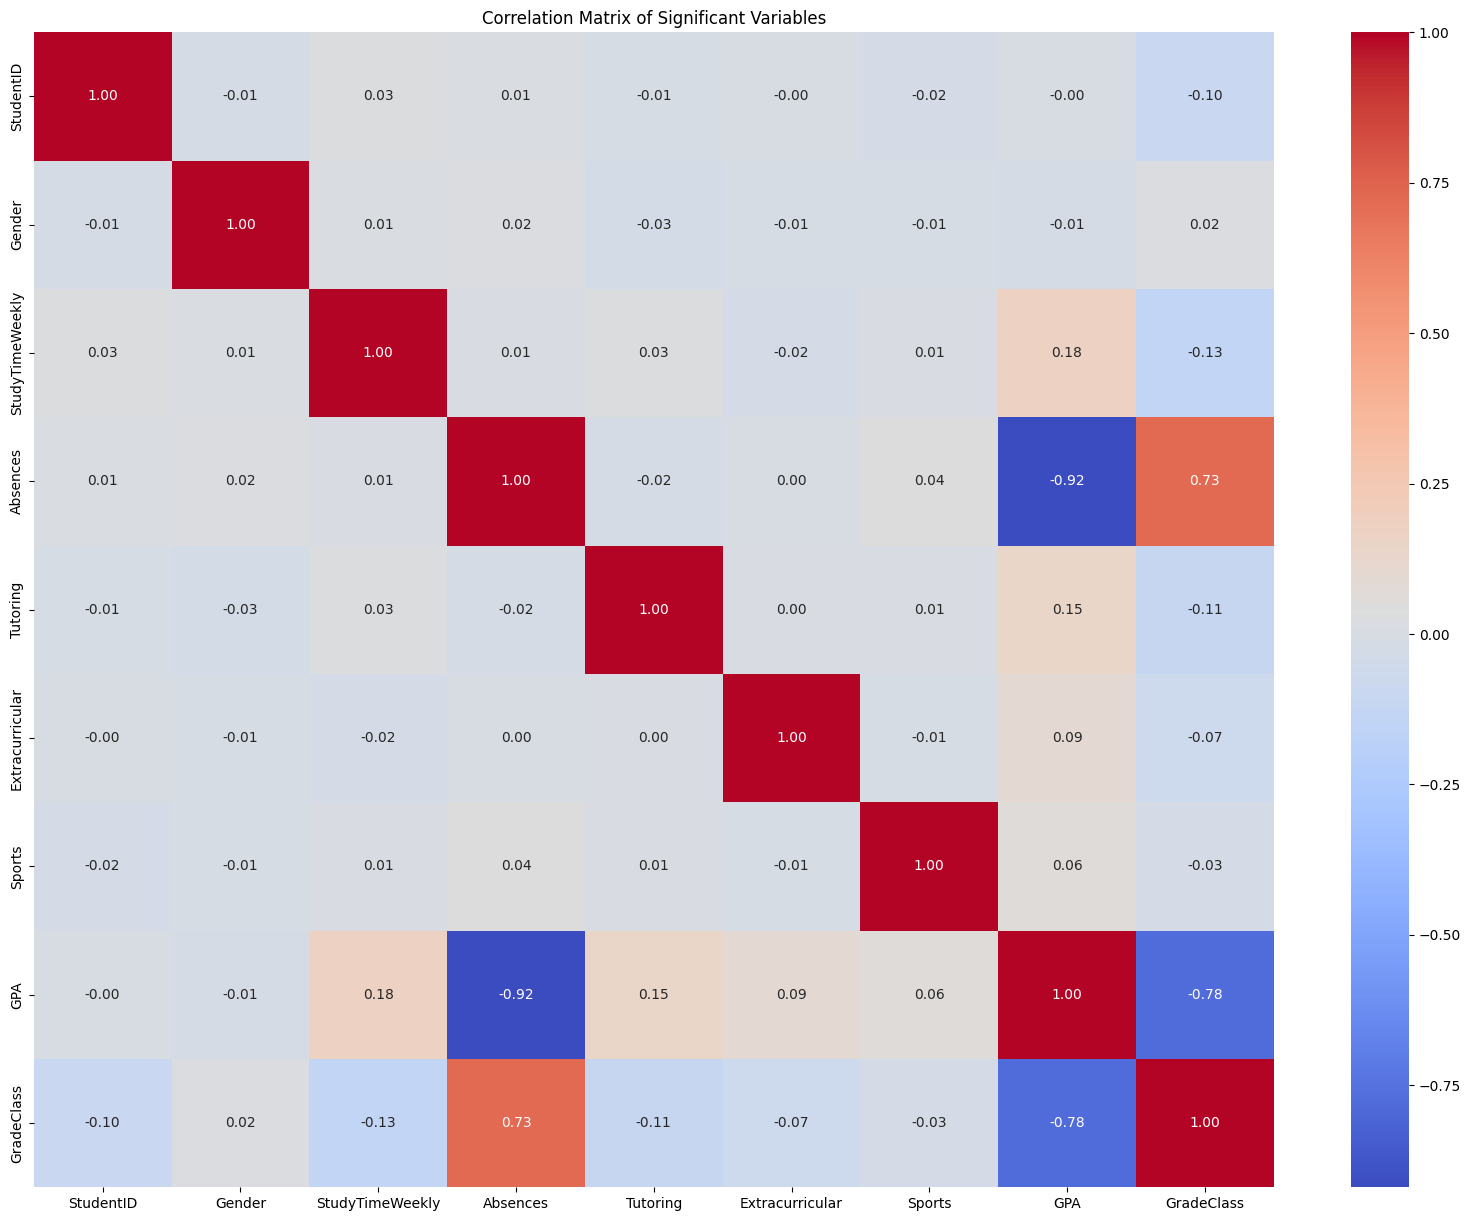

In [56]:
eda_columns = [
    'StudentID',
    'Gender',
    'StudyTimeWeekly',
    'Absences',
    'Tutoring',
    'Extracurricular',
    'Sports',
    'GPA',
    'GradeClass'
]

# Extract relevant data
eda_data = df[eda_columns]

# Generate summary statistics
summary_stats = eda_data.describe()

# Compute correlation matrix
correlation_matrix = eda_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Significant Variables')
plt.show()



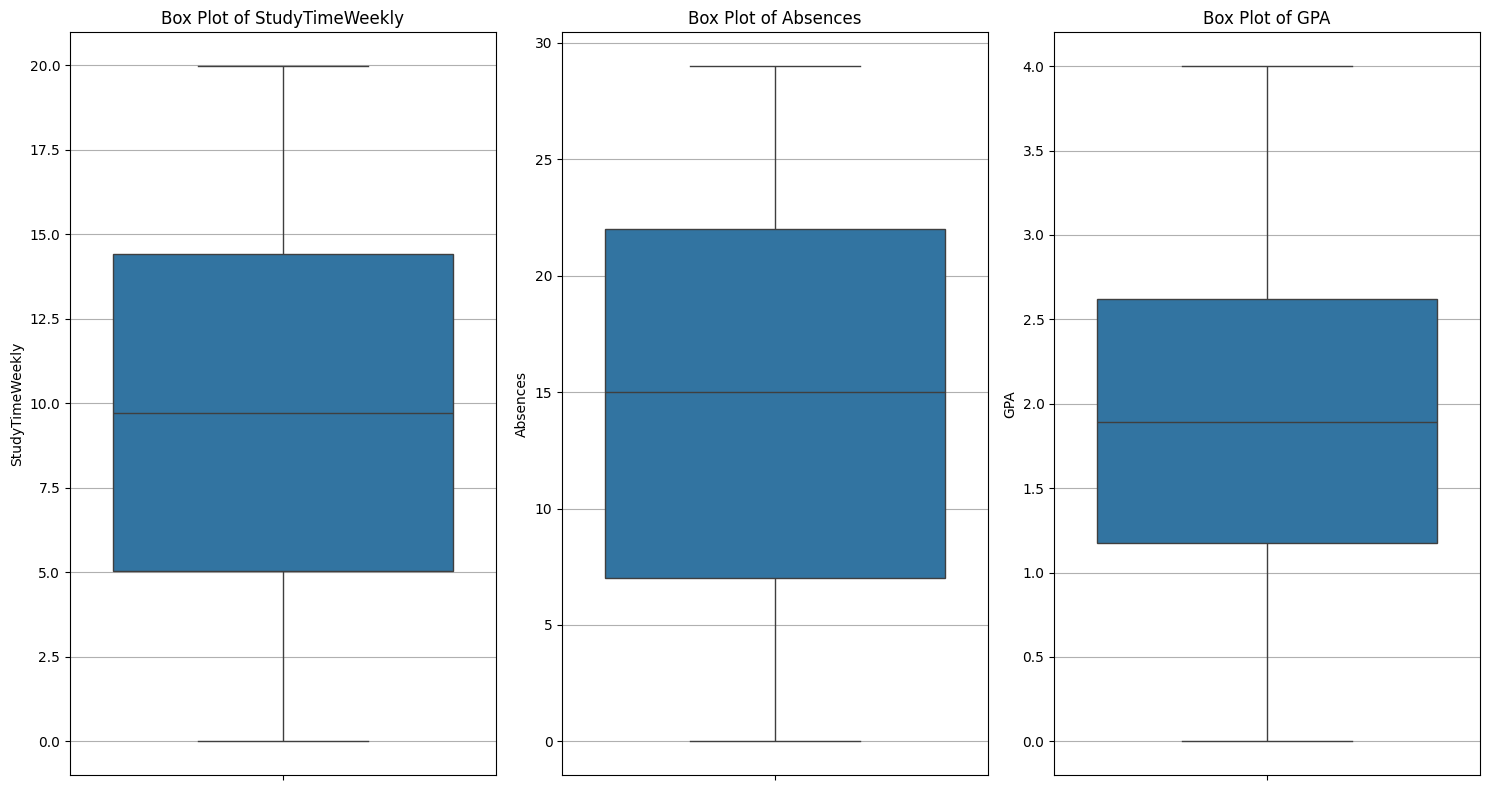

In [57]:
eda_columns = [
    'StudyTimeWeekly',
    'Absences',
    'GPA'
]

plt.figure(figsize=(15, 8))
for i, column in enumerate(eda_columns, 1):
    plt.subplot(1, len(eda_columns), i)
    sns.boxplot(y=df[column], flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8})
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Data Preprocessing

In [58]:
#checking null values
df.isna().sum()

StudentID          0
Gender             0
StudyTimeWeekly    0
Absences           0
Tutoring           0
Extracurricular    0
Sports             0
GPA                0
GradeClass         0
dtype: int64

In [59]:
#unique values
df.nunique()

StudentID          2392
Gender                2
StudyTimeWeekly    2392
Absences             30
Tutoring              2
Extracurricular       2
Sports                2
GPA                2371
GradeClass            5
dtype: int64

In [60]:
#duplicate values
df.duplicated().sum()

np.int64(0)

In [61]:
df.dtypes 
#types of data

StudentID            int64
Gender               int64
StudyTimeWeekly    float64
Absences             int64
Tutoring             int64
Extracurricular      int64
Sports               int64
GPA                float64
GradeClass           int64
dtype: object

# Model Implementation

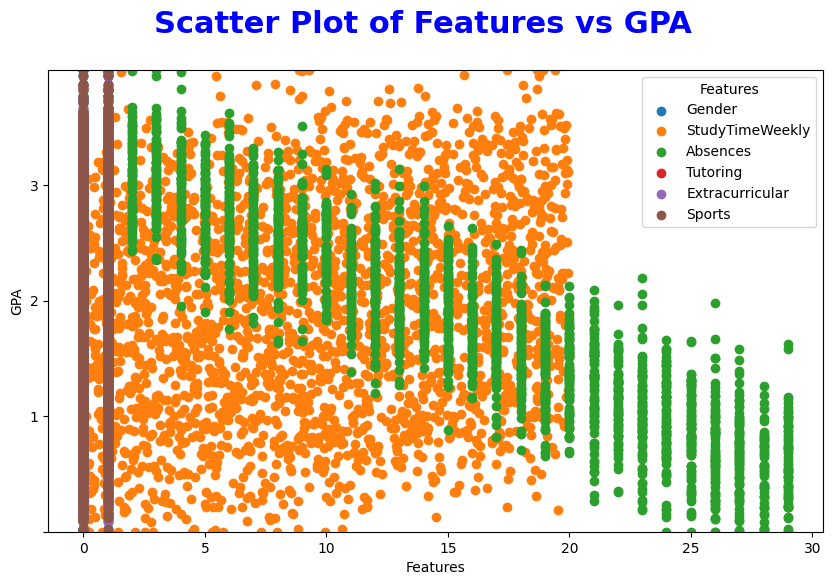

In [62]:
# Plot each feature separately against GPA
features = ["Gender", "StudyTimeWeekly", "Absences", "Tutoring", "Extracurricular", "Sports"]
fig, ax = plt.subplots(figsize=(10, 6))

# Loop over each feature and plot
for feature in features:
    ax.scatter(x=df[feature], y=df["GPA"], label=feature)

# Set labels, limits, and ticks
ax.set(xlabel="Features", ylabel="GPA",
       ylim=(0, 4),
       yticks=range(0, 4))

# Customize the plot
ax.legend(title="Features")

ax.yaxis.get_major_ticks()[0].label1.set_visible(False)

fig.suptitle(t="Scatter Plot of Features vs GPA",
             color="blue",
             fontsize=22,
             fontweight="bold")

# Display the plot
plt.show()


Data Splitting and Model Fitting

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [64]:
X = df.drop(["GPA", "GradeClass",'StudentID'], axis=1)
y = df["GPA"]

In [65]:
X.shape

(2392, 6)

In [66]:
y.shape

(2392,)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Random Forest Regressor

In [68]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
rf_train_score = rf.score(X_train,y_train)
print(f"Model Accuracy on training Datasets : {rf_train_score*100:.4f}%")

Model Accuracy on training Datasets : 98.5157%


In [69]:
rf_test_score = rf.score(X_test,y_test)
print(f"Model Accuracy on Test Datasets : {rf_test_score*100:.4f}%")

Model Accuracy on Test Datasets : 89.3475%


# Linear Regression

In [70]:
# Initialize the model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Calculate training accuracy (R² score)
lr_train_score = lr.score(X_train, y_train)

# Print the model accuracy on the training dataset
print(f"Model Accuracy on training Datasets: {lr_train_score*100:.4f}%")


Model Accuracy on training Datasets: 91.4762%


In [71]:
# Calculate test accuracy (R² score)
lr_test_score = lr.score(X_test, y_test)

# Print the model accuracy on the test dataset
print(f"Model Accuracy on Test Datasets: {lr_test_score*100:.4f}%")


Model Accuracy on Test Datasets: 91.4944%


Comparing Actual vs Predicted of Two Models on Test Data

In [72]:
# Make predictions using the trained models
lr_y_preds = lr.predict(X_test)
rf_y_preds = rf.predict(X_test)

# Create DataFrame with all relevant columns including predictions
vs_df = pd.DataFrame({
    'Gender': X_test['Gender'].values,
    'StudyTimeWeekly': X_test['StudyTimeWeekly'].values,
    'Absences': X_test['Absences'].values,
    'Tutoring': X_test['Tutoring'].values,
    'Extracurricular': X_test['Extracurricular'].values,
    'Sports': X_test['Sports'].values,
    'Actual': y_test.values,
    'LR_Predicted': lr_y_preds,
    'RF_Predicted': rf_y_preds
})

# Display the DataFrame
print(vs_df.head())


   Gender  StudyTimeWeekly  Absences  Tutoring  Extracurricular  Sports  \
0       0         7.670690         5         0                0       0   
1       0        16.070836        12         1                0       1   
2       1         4.257002        29         1                1       1   
3       1         4.190384        17         0                0       0   
4       0        13.274687         3         1                1       0   

     Actual  LR_Predicted  RF_Predicted  
0  2.224197      2.579502      2.472323  
1  2.745859      2.566375      2.233332  
2  0.912416      0.715547      0.772233  
3  1.482596      1.295136      1.209179  
4  2.913888      3.378234      3.423279  


Plotting Regression line on Scatter Plot

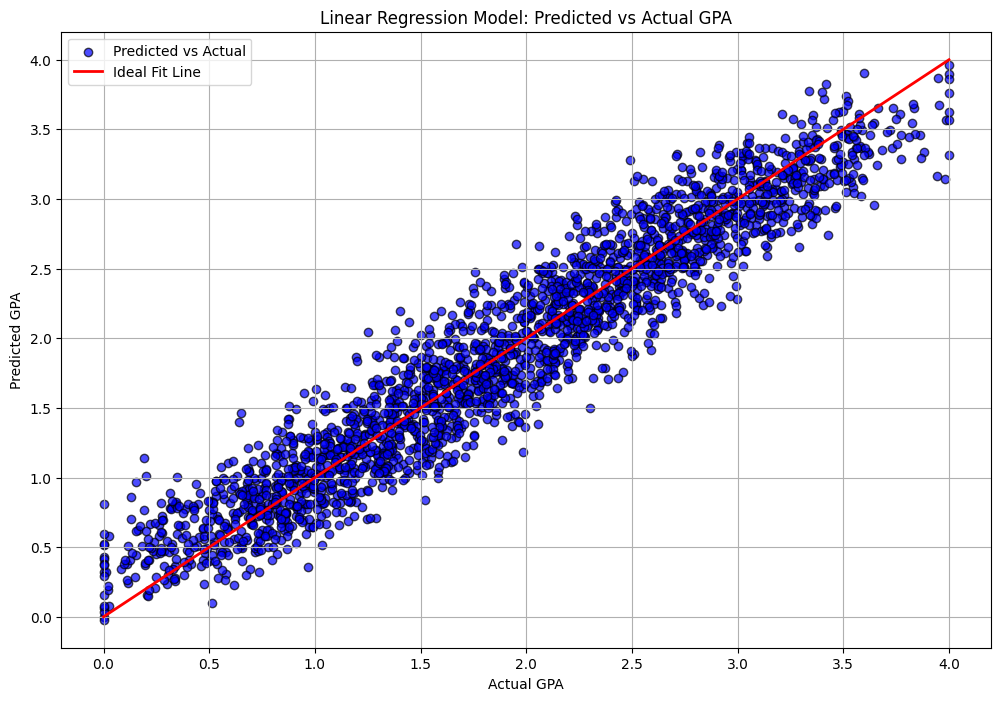

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler



# Normalize the features for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_scaled, y)

# Predict GPA using the linear model
y_preds = linear_model.predict(X_scaled)

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(y, y_preds, color='blue', edgecolors='k', alpha=0.7, label="Predicted vs Actual")
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', lw=2, label="Ideal Fit Line")

plt.title("Linear Regression Model: Predicted vs Actual GPA")
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.grid(True)
plt.legend()
plt.show()


Random Forest Regressor line on Scatter Plot

In [74]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")


X_train shape: (1913, 6), y_train shape: (1913,)


X_train shape: (1913, 6), y_train shape: (1913,)


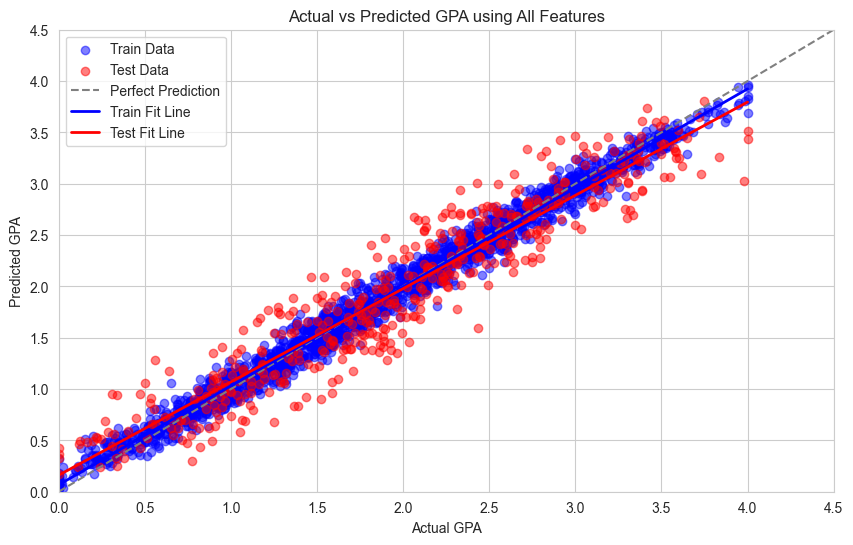

In [75]:
# Assuming rf, X_train, y_train, X_test, and y_test are already defined

# Get predictions for train and test data
y_train_preds = rf.predict(X_train)
y_test_preds = rf.predict(X_test)

# Print shape of training data
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

# Create the plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Actual vs Predicted for Training Data (blue) and Test Data (red)
ax.scatter(y_train, y_train_preds, c="blue", label="Train Data", alpha=0.5)
ax.scatter(y_test, y_test_preds, c="red", label="Test Data", alpha=0.5)

# Plot Random Forest Regressor Line (prediction line) for both train and test data
# This can be a simple diagonal line (indicating perfect predictions)
ax.plot([0, 4.5], [0, 4.5], color="gray", linestyle="--", label="Perfect Prediction")

# Optional: Fit line based on predictions (this will just show how well the model is predicting)
# Plot regression line for better understanding of the fit
train_slope, train_intercept = np.polyfit(y_train, y_train_preds, 1)
test_slope, test_intercept = np.polyfit(y_test, y_test_preds, 1)

# Add fitted lines for both training and test data
ax.plot(np.sort(y_train), train_slope * np.sort(y_train) + train_intercept, color="blue", linewidth=2, label="Train Fit Line")
ax.plot(np.sort(y_test), test_slope * np.sort(y_test) + test_intercept, color="red", linewidth=2, label="Test Fit Line")

# Set the labels, title, and plot limits
ax.set(
    xlabel="Actual GPA",
    ylabel="Predicted GPA",
    title="Actual vs Predicted GPA using All Features",
    xlim=(0, 4.5),
    ylim=(0, 4.5)
)

# Add legend
ax.legend()

# Show plot
plt.show()


Prediction on Unseen Data

In [76]:
import pandas as pd

# Function to map GPA to a letter grade
def gpa_to_letter_grade(gpa):
    if gpa >= 4.0:
        return "A+"
    elif gpa >= 3.7:
        return "A-"
    elif gpa >= 3.3:
        return "B+"
    elif gpa >= 3.0:
        return "B"
    elif gpa >= 2.7:
        return "B-"
    elif gpa >= 2.3:
        return "C+"
    elif gpa >= 2.0:
        return "C"
    elif gpa >= 1.7:
        return "C-"
    elif gpa >= 1.3:
        return "D+"
    elif gpa >= 1.0:
        return "D"
    elif gpa >= 0.7:
        return "D-"
    else:
        return "F"

# Get input data from the user
gender = int(input("Enter Gender (0 for male, 1 for female): "))
study_time = float(input("Enter daily study time in hours: "))
absences = int(input("Enter number of absences: "))
tutoring = int(input("Received tutoring? (1 for yes, 0 for no): "))
extracurricular = int(input("Participate in extracurricular activities? (1 for yes, 0 for no): "))
sports = int(input("Participate in sports? (1 for yes, 0 for no): "))

study_time_week = study_time * 7

# Create DataFrame based on user input
study_data = pd.DataFrame({
    "Gender": [gender],
    "StudyTimeWeekly": [study_time_week],
    "Absences": [absences],
    "Tutoring": [tutoring],
    "Extracurricular": [extracurricular],
    "Sports": [sports]
})

# Predict GPA using the trained Linear Regression model
lr_score_preds = lr.predict(study_data)

# Cap the predicted GPA at 4 if it's higher
predicted_gpa = min(lr_score_preds[0], 4)

# Map the predicted GPA to a letter grade
letter_grade = gpa_to_letter_grade(predicted_gpa)

# Output the predicted GPA and letter grade
print(f"\nLinear Regression Model Predicted GPA : {predicted_gpa:.4f}")
print(f"Grade Class : {letter_grade}")


Enter Gender (0 for male, 1 for female):  1
Enter daily study time in hours:  1
Enter number of absences:  1
Received tutoring? (1 for yes, 0 for no):  1
Participate in extracurricular activities? (1 for yes, 0 for no):  1
Participate in sports? (1 for yes, 0 for no):  1



Linear Regression Model Predicted GPA : 3.5910
Grade Class : B+


In [77]:
import pandas as pd

# Function to map GPA to a letter grade
def gpa_to_letter_grade(gpa):
    if gpa >= 4.0:
        return "A+"
    elif gpa >= 3.7:
        return "A-"
    elif gpa >= 3.3:
        return "B+"
    elif gpa >= 3.0:
        return "B"
    elif gpa >= 2.7:
        return "B-"
    elif gpa >= 2.3:
        return "C+"
    elif gpa >= 2.0:
        return "C"
    elif gpa >= 1.7:
        return "C-"
    elif gpa >= 1.3:
        return "D+"
    elif gpa >= 1.0:
        return "D"
    elif gpa >= 0.7:
        return "D-"
    else:
        return "F"

# Function to get input from the user
def get_user_input():
    gender = int(input("Enter Gender (0 for male, 1 for female): "))
    study_time = float(input("Enter Study Time Weekly (in hours): "))
    absences = int(input("Enter Number of Absences: "))
    tutoring = int(input("Enter whether Tutoring is received (1 for yes, 0 for no): "))
    extracurricular = int(input("Enter whether Extracurricular activities are participated (1 for yes, 0 for no): "))
    sports = int(input("Enter whether Sports are participated (1 for yes, 0 for no): "))

    # Create the DataFrame with the user's input
    studydata = pd.DataFrame({
        "Gender": [gender],
        "StudyTimeWeekly": [study_time],
        "Absences": [absences],
        "Tutoring": [tutoring],
        "Extracurricular": [extracurricular],
        "Sports": [sports]
    })
    
    return studydata

# Get the user's input
studydata = get_user_input()

# Predict the GPA using the trained Random Forest model
rf_score_preds = rf.predict(studydata)

# Cap the predicted GPA at 4 if it's higher
predicted_gpa = min(rf_score_preds[0], 4)

# Map the predicted GPA to a letter grade
letter_grade = gpa_to_letter_grade(predicted_gpa)

# Output the predicted GPA and letter grade
print(f"\nRandom Forest Model Predicted GPA : {predicted_gpa:.4f}")
print(f"Grade Class: {letter_grade}")


Enter Gender (0 for male, 1 for female):  1
Enter Study Time Weekly (in hours):  1
Enter Number of Absences:  1
Enter whether Tutoring is received (1 for yes, 0 for no):  1
Enter whether Extracurricular activities are participated (1 for yes, 0 for no):  1
Enter whether Sports are participated (1 for yes, 0 for no):  1



Random Forest Model Predicted GPA : 3.1471
Grade Class: B


# Model Evaluation and Discussion

In [78]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Mean Absolute Error

In [79]:
rf_y_preds = rf.predict(X_test)
lr_y_preds = lr.predict(X_test)
print(f"RF_Mean Absolute Error : {mean_absolute_error(y_test, rf_y_preds)}\n")
print(f"LR_Mean Absolute Error : {mean_absolute_error(y_test, lr_y_preds)}\n")


RF_Mean Absolute Error : 0.23772155284634666

LR_Mean Absolute Error : 0.21156860856772797



Mean  Squared Error

In [80]:
rf_y_preds = rf.predict(X_test)
lr_y_preds = lr.predict(X_test)

# Calculate Mean Squared Error (MSE) for both models
print(f"RF_Mean Squared Error : {mean_squared_error(y_test, rf_y_preds)}\n")
print(f"LR_Mean Squared Error : {mean_squared_error(y_test, lr_y_preds)}\n")

RF_Mean Squared Error : 0.0869626264091855

LR_Mean Squared Error : 0.06943617316354136



R-squared value

In [81]:
# Predict using the Random Forest and Linear Regression models
rf_y_preds = rf.predict(X_test)
lr_y_preds = lr.predict(X_test)

# Calculate and print R-squared for both models
print(f"RF R-squared Value: {r2_score(y_test, rf_y_preds):.4f}\n")
print(f"LR R-squared Value: {r2_score(y_test, lr_y_preds):.4f}\n")

RF R-squared Value: 0.8935

LR R-squared Value: 0.9149



Discussion

The evaluation metrics reveal that both models perform well, but Linear Regression (LR) slightly outperforms Random Forest (RF) across all metrics. The Mean Absolute Error (MAE) shows that LR predicts GPA with a smaller average error (0.2116) compared to RF (0.2371), indicating more accurate predictions. Similarly, the Mean Squared Error (MSE) for LR (0.0694) is lower than RF’s (0.0854), suggesting fewer large prediction errors. Moreover, the R-squared (R²) values indicate that LR explains 91.49% of the variance in GPA, whereas RF explains 89.46%. Overall, LR demonstrates better performance, making it more suitable for this dataset.

# Conclusion

In conclusion, while the Random Forest model excels in capturing complex patterns with higher training accuracy, its lower test accuracy suggests overfitting. On the other hand, the Linear Regression model demonstrates better generalization with balanced performance across both training and test datasets, making it a more reliable choice for this prediction task.

# References

https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

In [82]:
import pickle as pk

In [83]:
pk.dump(lr,open('LinearRegressionModel.pkl','wb'))